In [1]:
import pickle
import random
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from typo_detection_dataset import TypoDataset

In [2]:
words = []
labels = []
sources = ['amazon_medium', 'imdb_medium']
for source in sources:
    words.extend(pickle.load(open(f"../../data/files_pickle/words_{source}.pickle", "rb")))
    labels.extend(pickle.load(open(f"../../data/files_pickle/labels_{source}.pickle", "rb")))

In [3]:
data = list(zip(words, labels))
random.shuffle(data)
words, labels = zip(*data)
print(f'Number of sentences in dataset: {len(words)}')

Number of sentences in dataset: 281549


In [4]:
random_idx = random.randint(0, len(words))
random_idx = 22
random_words = words[random_idx]
random_labels = labels[random_idx]
for word, label in zip(random_words, random_labels):
    print("%-30s %-1s" % (word, label))

these                          0
are                            0
mye                            1
faborite                       1
flavortd                       1
almolds                        1
intense                        0
flavor                         0
i                              0
cadnt                          1
get                            0
senough                        1
liem                           1
hard                           0
to                             0
find                           0
in                             0
the                            0
stores                         0
tiough                         1
soretimes                      1


In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

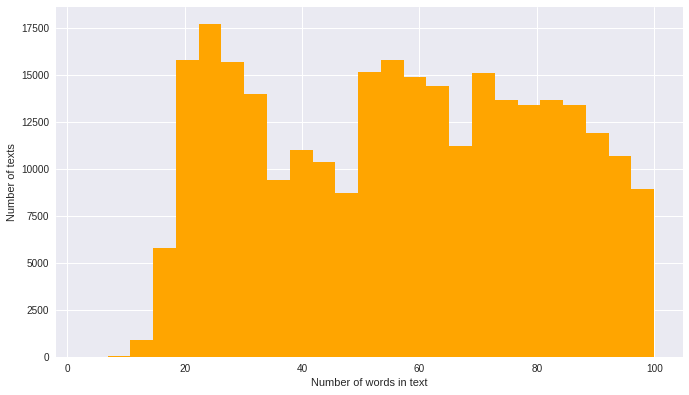

In [20]:
labels_lens = [len(l) for l in labels]

plt.style.use('fast')
plt.figure(figsize=(10,6))
plt.hist(labels_lens, bins=25, color='orange')
plt.xlabel('Number of words in text')
plt.ylabel('Number of texts')
plt.savefig('Number_of_sentences.jpg')
plt.show()

In [31]:
labels_one = sum([sum(l) for l in labels])
labels_all = sum([len(l) for l in labels]) 

print(f'Percentage of misspelled words in dataset: {round(labels_one / labels_all, 4)}')

Percentage of misspelled words in dataset: 0.3266


In [64]:
ds = TypoDataset()
tokenized_words, tokenized_labels = ds._tokenize_and_preserve_labels(random_words, random_labels)
tokenized_ids = ds.tokenizer.convert_tokens_to_ids(tokenized_words)

print("%-30s %-30s %-1s" % ("WORD", "TOKENIZER ID", "LABEL"))
print('-' * 80)
for word, idx, label in zip(tokenized_words, tokenized_ids, tokenized_labels):
    print("%-30s %-30s %-1s" % (word, idx, label))

WORD                           TOKENIZER ID                   LABEL
--------------------------------------------------------------------------------
[CLS]                          101                            0
very                           2200                           0
good                           2204                           0
pro                            4013                           1
##du                           8566                           1
##te                           2618                           1
still                          2145                           0
gr                             24665                          1
##wing                         9328                           1
for                            2005                           0
me                             2033                           0
i                              1045                           0
pu                             16405                          1
##rc               

In [ ]:
zip_list = list(zip(words, labels))
random.shuffle(zip_list)
words, labels = zip(*zip_list)

In [65]:
train_part = 20000
val_part = 4000
modes = ['train', 'val']
words_m = [words[:train_part], words[train_part:(train_part + val_part)]]
labels_m = [labels[:train_part], labels[train_part:(train_part + val_part)]]

In [66]:
for mode, word, label in zip(modes, words_m, labels_m):
    ds = TypoDataset(mode=mode)
    inp, tg, msk = ds.prepare_dataset(word, label, out_path='../../data/typo_ds/amazon_imdb_big_20k_4k')

In [67]:
print("%-10s %-10s %-10s" % ("WORD_ID", "WORD_LABEL", "WORD_MASK"))
for inp_t, tg_t, msk_t in zip(inp[22], tg[22], msk[22]):
    print("%-10s %-10s %-10s" % (inp_t.item(), tg_t.item(), msk_t.item()))

WORD_ID    WORD_LABEL WORD_MASK 
101        0          1         
2026       0          1         
1017       0          1         
2095       0          1         
2214       0          1         
8840       1          1         
21030      1          1         
2015       1          1         
2122       0          1         
1997       1          1         
2099       1          1         
6265       0          1         
11937      1          1         
14844      1          1         
2063       1          1         
1037       0          1         
24209      1          1         
4886       1          1         
16344      1          1         
4031       0          1         
10424      1          1         
29147      1          1         
16216      0          1         
20473      0          1         
2008       0          1         
2024       0          1         
19413      1          1         
13102      1          1         
2135       1          1         
4810      